In [27]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from myutils.process_utils import process_linedf, post_process
from myutils.analysis_utils import load_daydf, load_routinedf, map_plot



In [28]:
date = 6
nidx = 90
direction = 1

29

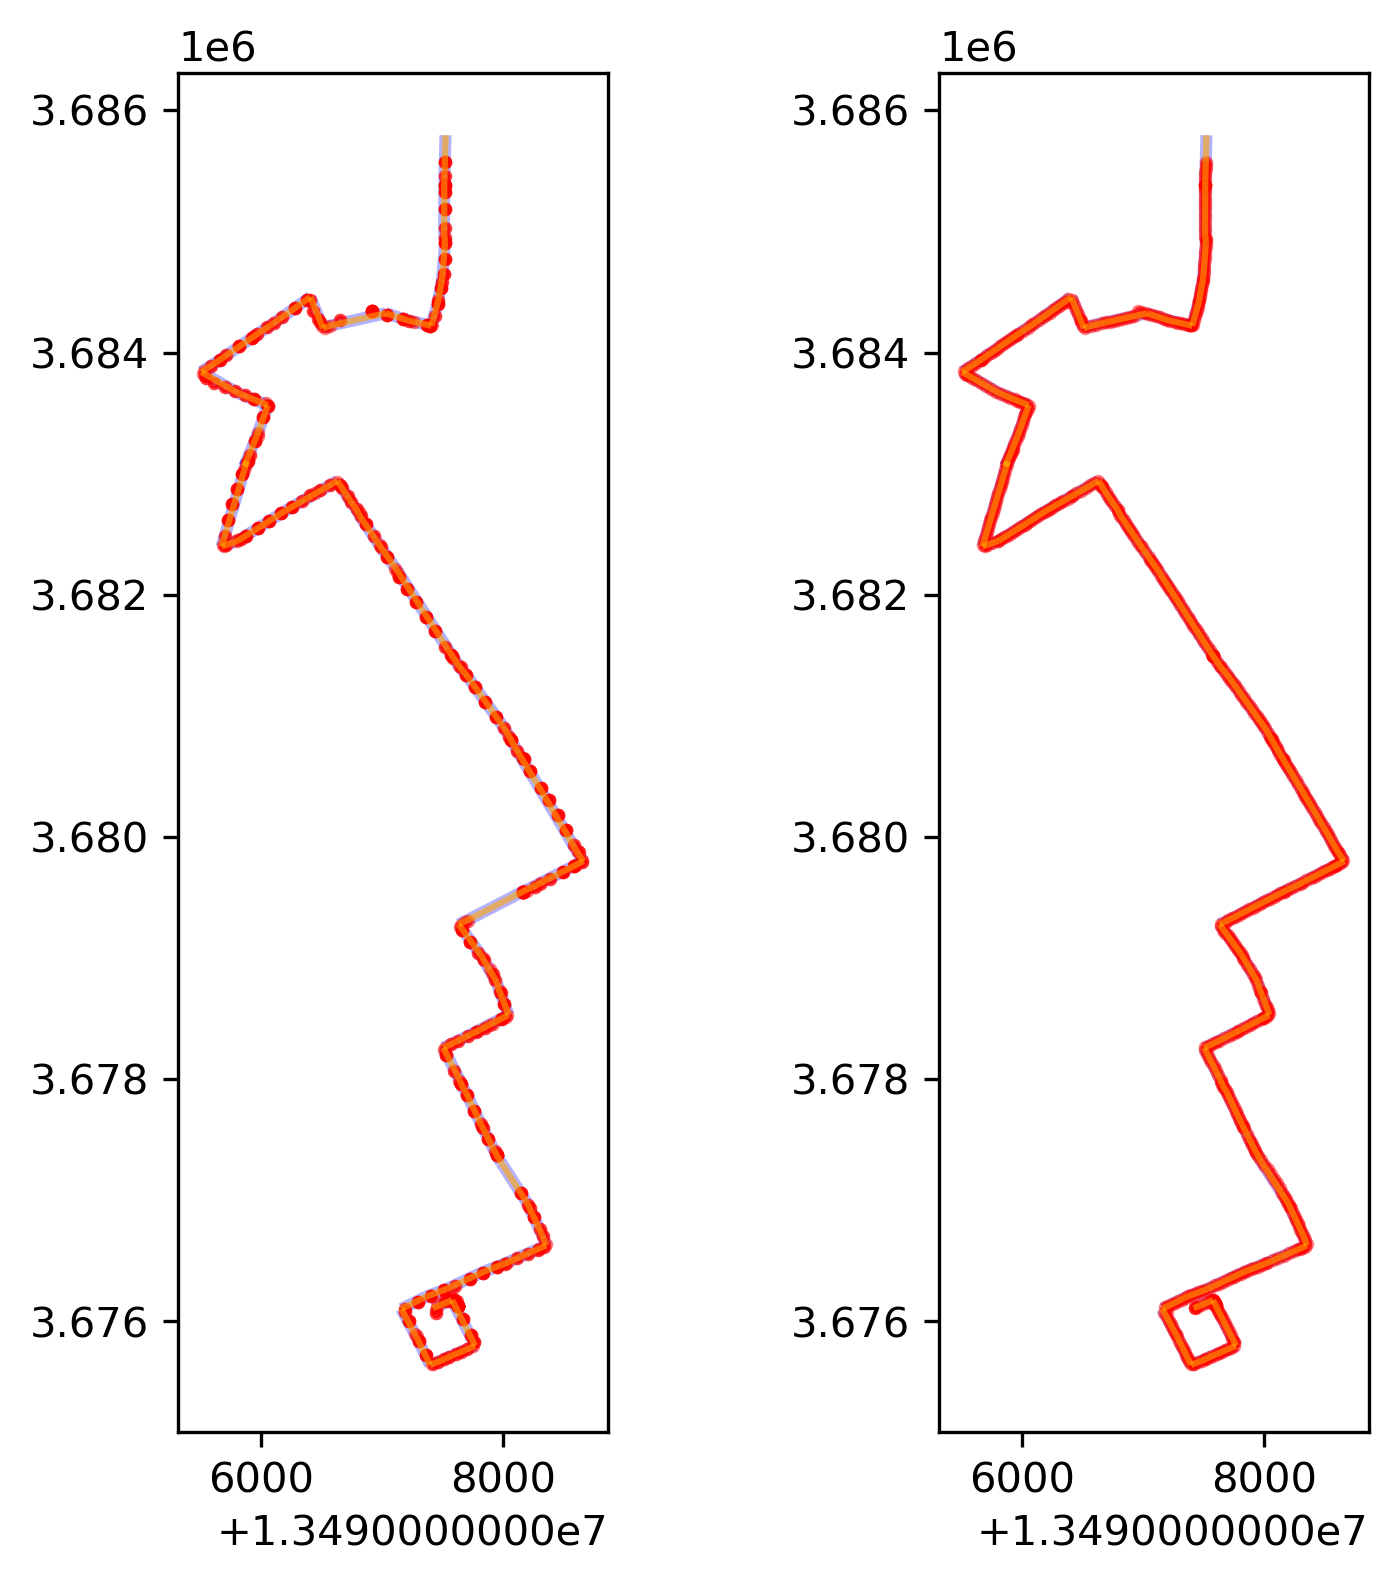

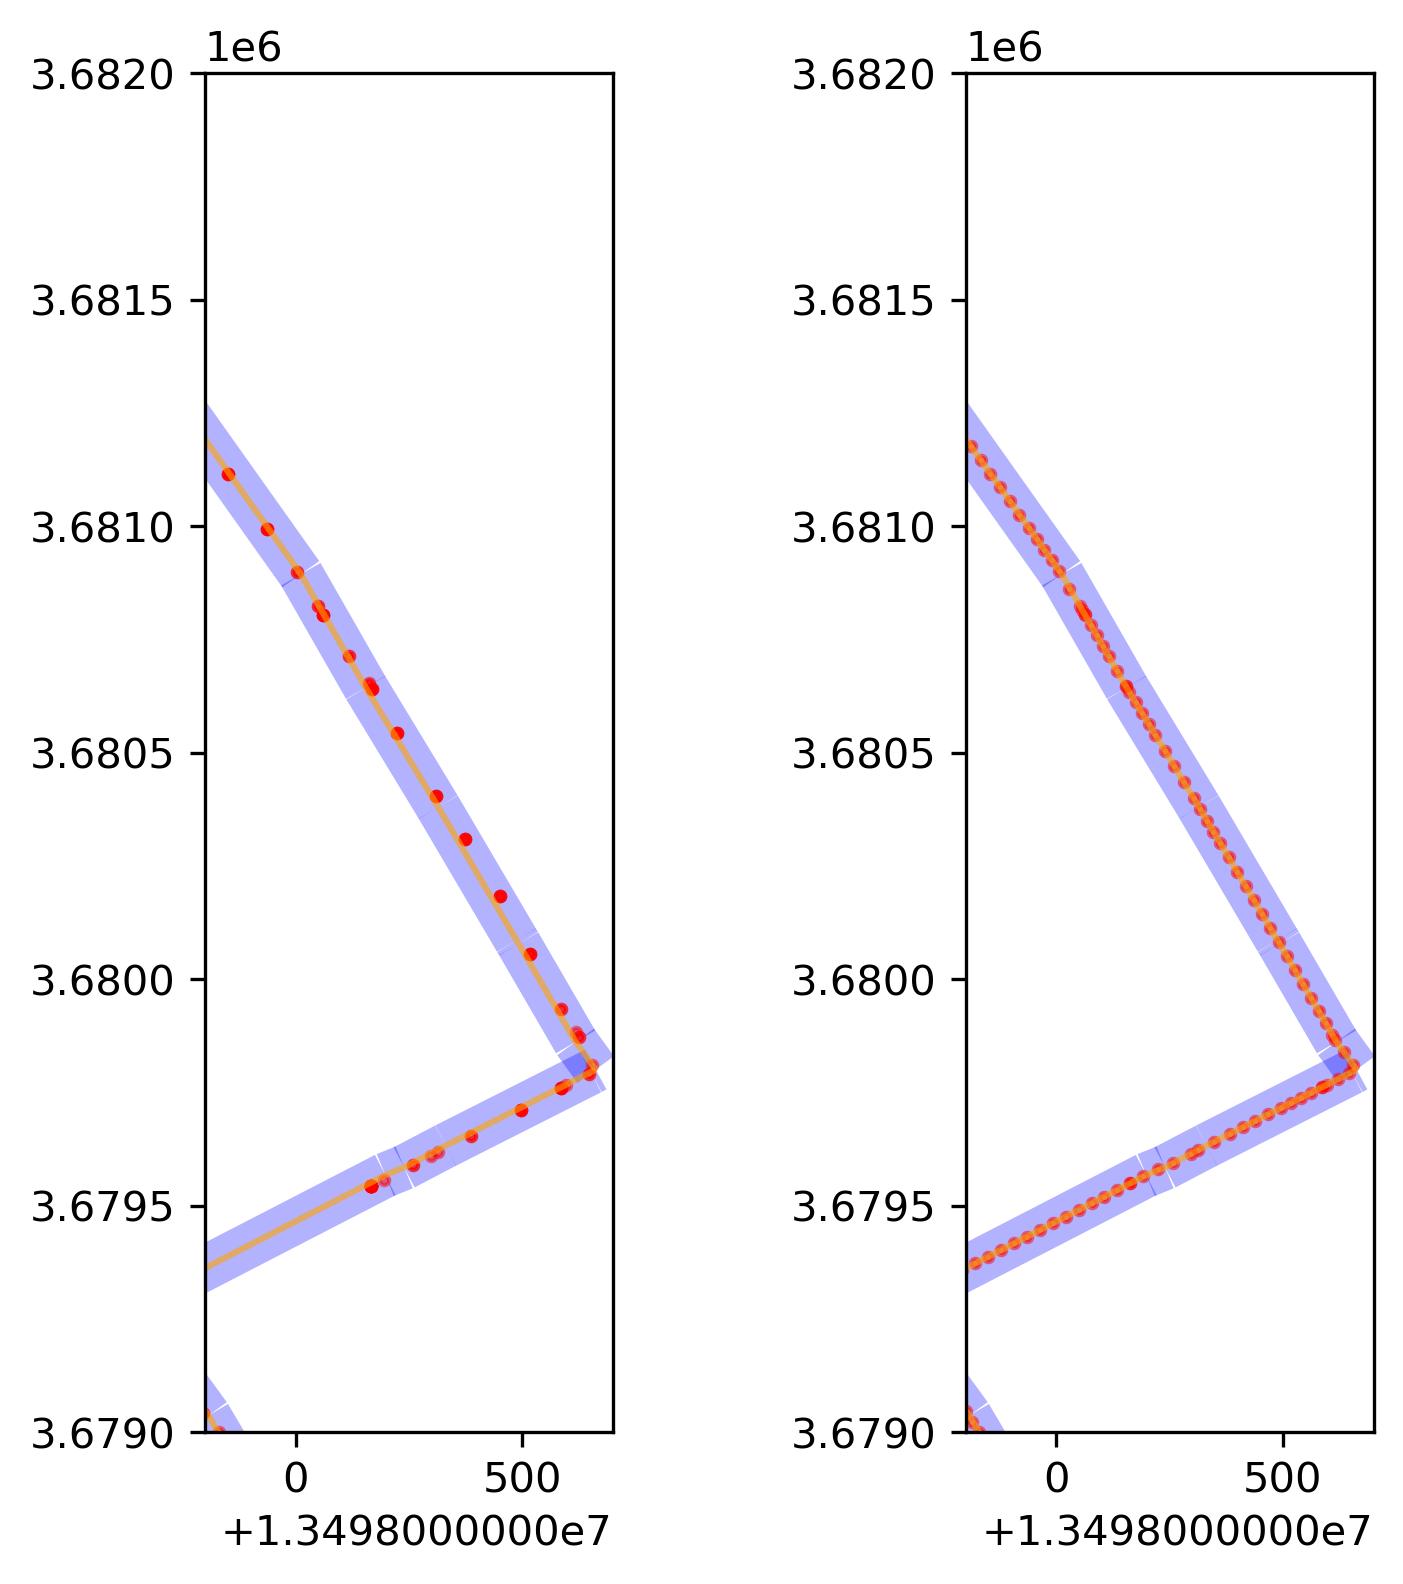

In [30]:
day = load_daydf(date)
routine = load_routinedf(day, nidx, direction)
mapline = process_linedf(direction)
xlim = (7800+1.349e7, 8700+1.349e7)
ylim = (3.679e6, 3.682e6)
map_plot(mapline, routine)
map_plot(mapline, routine, xlim, ylim)

station_time_res = routine.loc[routine['station_status'] != 0, ['time','cum_length', 'station_status']].groupby('station_status').agg('mean').sort_values('time')
len(station_time_res)


In [32]:
up_linedf = mapline = process_linedf(0)
down_linedf = mapline = process_linedf(1)
old_start_point = down_linedf.loc[0,'geometry']
new_start_point = up_linedf.loc[len(up_linedf)-1,'geometry']

In [44]:
down_linedf.loc[0].geometry.length

172.92564907207168

In [47]:
# up_linedf.loc[len(up_linedf)-1,'geometry'].length

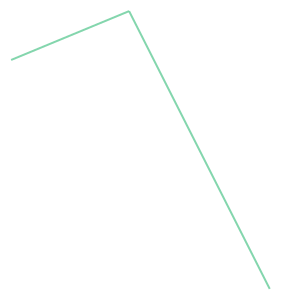

In [46]:
from shapely import geometry as geo
geo.GeometryCollection([old_start_point, down_linedf.loc[1,'geometry']])

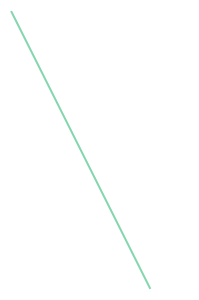

In [36]:
geo.GeometryCollection([new_start_point])


In [25]:
day = load_daydf(6)
routine = load_routinedf(day, 1, 1)


In [26]:
routine[['time','velocity','station_status','start','end']].sort_values('time')

,time,velocity,station_status,start,end
0,2021-09-06 09:24:41,0.0,0,交叉口0,交叉口1
1,2021-09-06 09:24:46,0.747296,0,交叉口0,交叉口1
2,2021-09-06 09:24:51,0.465844,0,交叉口0,交叉口1
3,2021-09-06 09:25:19,6.431233,0,交叉口0,交叉口1
4,2021-09-06 09:25:46,6.431233,0,交叉口0,交叉口1
...,...,...,...,...,...
601,2021-09-06 10:35:51,0.300355,0,交叉口58,交叉口59
602,2021-09-06 10:36:01,0.352525,0,交叉口58,交叉口59
603,2021-09-06 10:36:11,2.476155,菊园车站,交叉口59,菊园车站
604,2021-09-06 10:36:16,9.281148,菊园车站,交叉口59,菊园车站


2021-09-06 04:19:04 2021-09-06 22:49:19


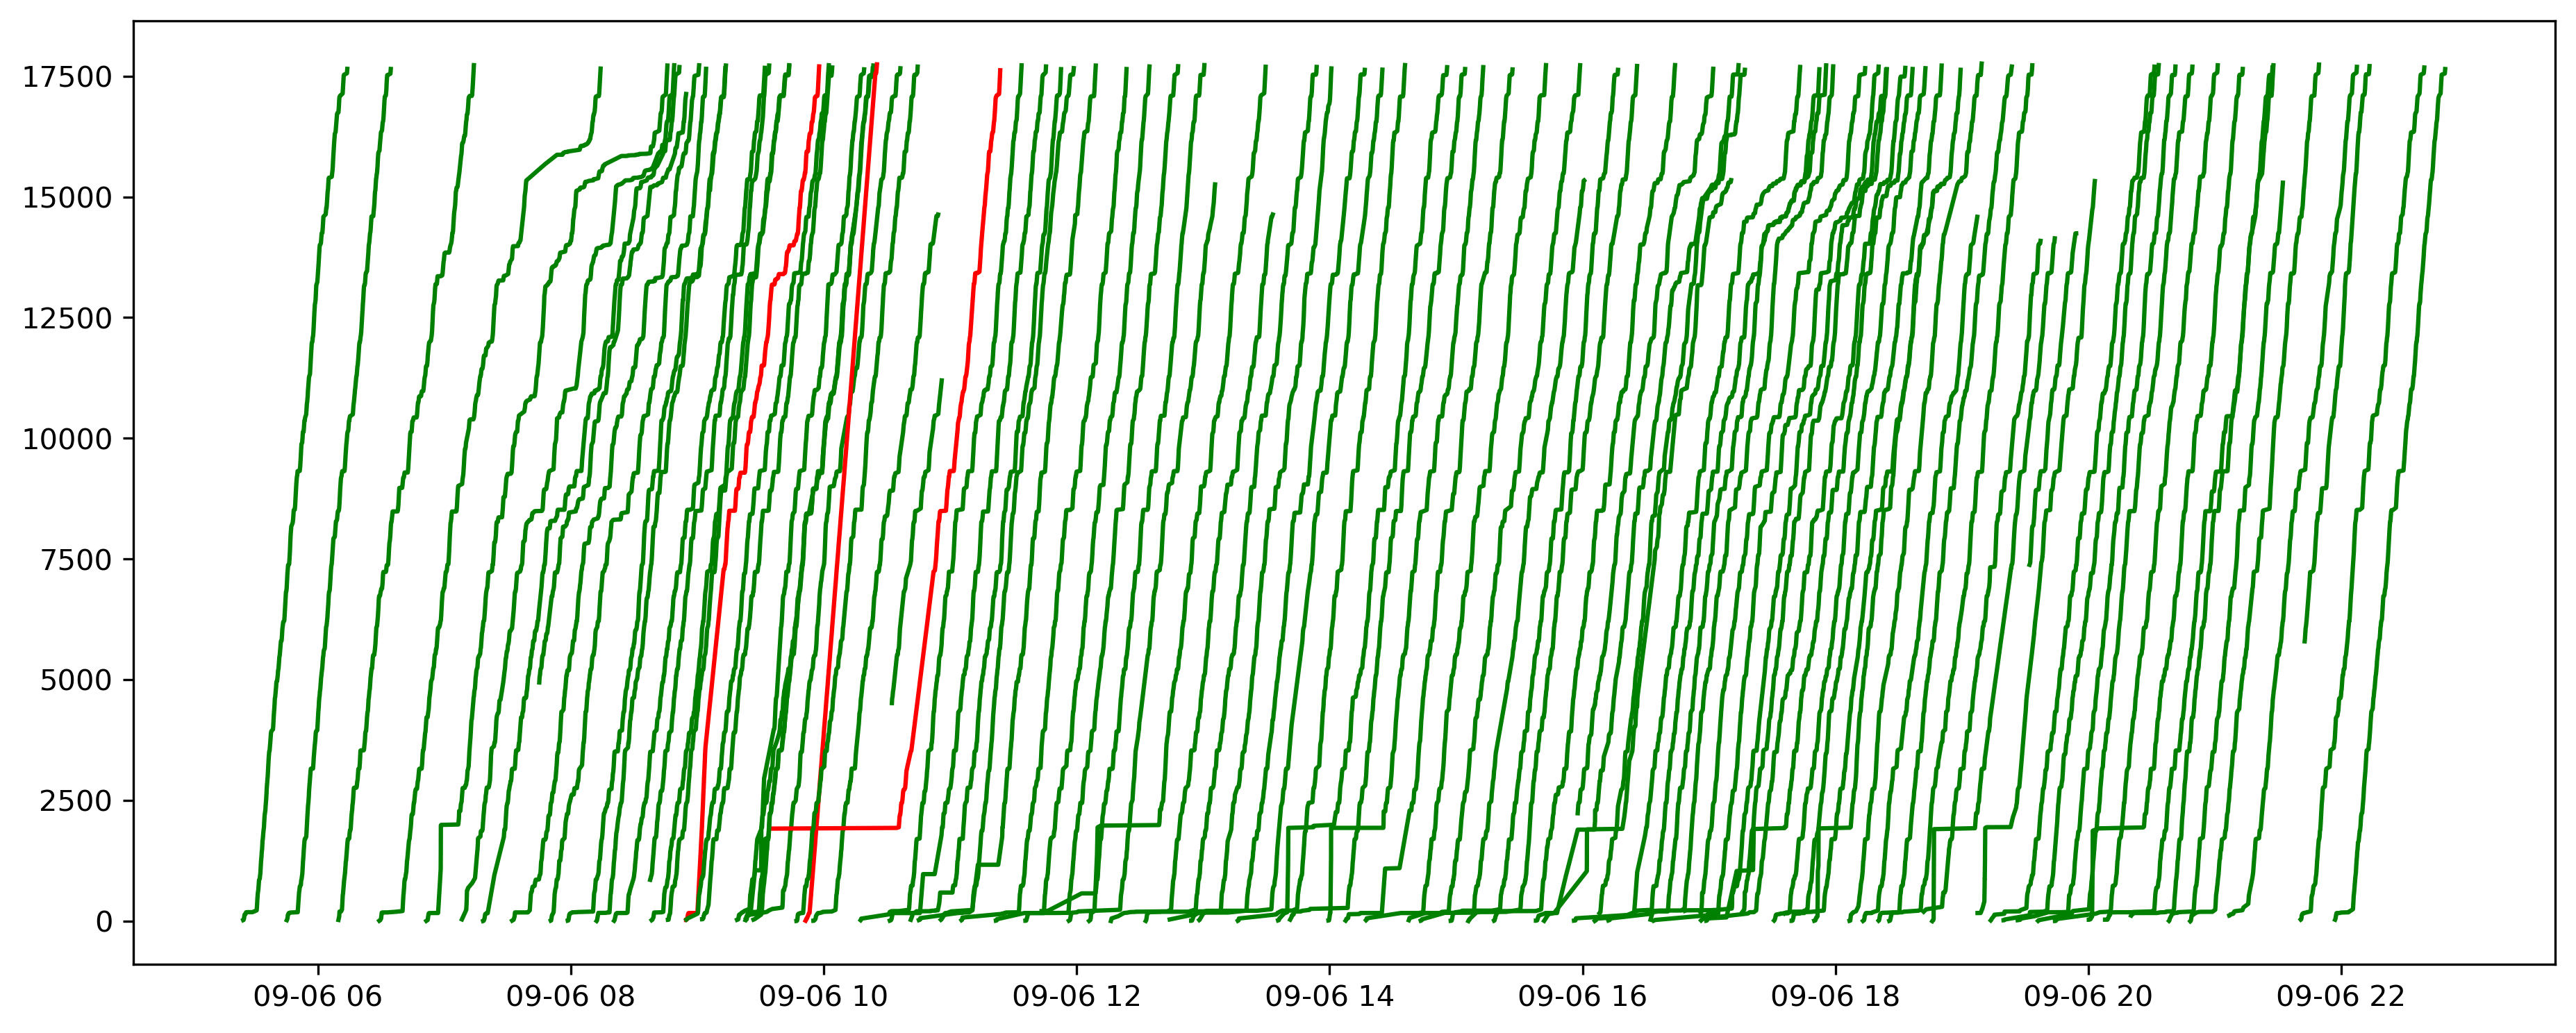

In [37]:
print(day.time.min(), day.time.max()) 
fig, ax = plt.subplots(dpi=300, figsize = (15,6))
for nidx in day.nidx.unique():
    routine = load_routinedf(day, nidx, direction)
    routine = post_process(routine, day=date)
    if len(routine) > 0:
        if routine.deadheading[0] == 0:
            ax.plot(routine.time, routine.cum_length, color = 'green')
        else:
            ax.plot(routine.time, routine.cum_length, color = 'red')
        
# ax.plot(routine1.time, routine1.cum_length)
# ax.plot(routine2.time, routine2.cum_length)

In [51]:
day = load_daydf(6)
down_start = day.loc[(day['direction']==1) & (day['station_status']=='公交嘉定新城站')].groupby(['nidx','station_status'])['time'].agg(['min','max']).sort_values('max')
for i in down_start['max']:
    print(i)


2021-09-06 05:25:42
2021-09-06 05:46:33
2021-09-06 06:10:09
2021-09-06 06:39:58
2021-09-06 06:56:59
2021-09-06 07:09:14
2021-09-06 07:20:32
2021-09-06 07:38:49
2021-09-06 07:51:28
2021-09-06 07:59:57
2021-09-06 08:16:14
2021-09-06 08:26:12
2021-09-06 08:39:20
2021-09-06 08:47:01
2021-09-06 09:00:03
2021-09-06 09:00:16
2021-09-06 09:04:03
2021-09-06 09:20:52
2021-09-06 09:25:11
2021-09-06 09:25:15
2021-09-06 09:29:56
2021-09-06 09:30:15
2021-09-06 09:50:11
2021-09-06 09:52:55
2021-09-06 09:57:48
2021-09-06 10:31:06
2021-09-06 10:42:37
2021-09-06 10:45:38
2021-09-06 10:58:27
2021-09-06 11:03:39
2021-09-06 11:25:40
2021-09-06 11:44:24
2021-09-06 11:53:12
2021-09-06 12:06:50
2021-09-06 12:20:00
2021-09-06 12:22:06
2021-09-06 12:50:58
2021-09-06 12:56:37
2021-09-06 12:57:42
2021-09-06 13:00:11
2021-09-06 13:35:10
2021-09-06 13:38:44
2021-09-06 14:07:50
2021-09-06 14:20:24
2021-09-06 14:24:47
2021-09-06 14:42:10
2021-09-06 14:52:25
2021-09-06 15:00:51
2021-09-06 15:09:01
2021-09-06 15:10:19


In [12]:
day.loc[(day['direction']==1) & (day['station_status']=='公交嘉定新城站')]

,vid,time,lon,lat,direction,nidx,deadheading,month,day,geometry,...,start_is_station,end_is_station,start,end,cur_length,cum_length,diff_distance,diff_time,velocity,station_status
102671,15,2021-09-06 18:05:15,121.2496,31.3328,1,78,0,9,6,POINT (13497443.730888104 3676045.39969954),...,True,False,公交嘉定新城站,交叉口0,25.523172,25.523172,NaN,NaN,0.0,公交嘉定新城站
102672,15,2021-09-06 18:05:20,121.24957,31.33279,1,78,0,9,6,POINT (13497440.391303381 3676044.096438819),...,True,False,公交嘉定新城站,交叉口0,25.523172,25.523172,0.0,5.0,0.0,公交嘉定新城站
102673,15,2021-09-06 18:05:30,121.24955,31.332787,1,78,0,9,6,POINT (13497438.164913563 3676043.705460629),...,True,False,公交嘉定新城站,交叉口0,25.523172,25.523172,0.0,10.0,0.0,公交嘉定新城站
102674,15,2021-09-06 18:05:41,121.24953,31.332762,1,78,0,9,6,POINT (13497435.938523747 3676040.447309535),...,True,False,公交嘉定新城站,交叉口0,25.523172,25.523172,0.0,11.0,0.0,公交嘉定新城站
109759,14,2021-09-06 20:38:01,121.24959,31.332848,1,83,0,9,6,POINT (13497442.617693195 3676051.655352931),...,True,False,公交嘉定新城站,交叉口0,25.523172,25.523172,NaN,NaN,0.0,公交嘉定新城站


In [52]:
first_start_timetable = pd.DataFrame()
last_start_timetable = pd.DataFrame()
first_start_direction_list = []
last_start_direction_list = []
first_start_date_list = []
last_start_date_list = []
first_start_time_list = []
last_start_time_list = []
for date in [6,
            # 7,
            # 8,
            # 9,
            # 10,
            ]:
    day = load_daydf(date)
    for direction in [0, 1]:
        if direction == 0:
            direc_str = 'up'
            start_timetable = day.loc[(day['direction']==direction) & (day['station_status']=='菊园车站')].groupby(['nidx','station_status'])['time'].agg(['max'])
        else:
            direc_str = 'down'
            start_timetable = day.loc[(day['direction']==direction) & (day['station_status']=='公交嘉定新城站')].groupby(['nidx','station_status'])['time'].agg(['max'])
        # if len(start_timetable)
        first_start_time_list.append(start_timetable.min())
        last_start_time_list.append(start_timetable.max())
        first_start_date_list.append(date)
        last_start_date_list.append(date)
        first_start_direction_list.append(direction)
        last_start_direction_list.append(direction)
        print(str(date) + ':\n' + str(start_timetable.min()) + '\n' +  str(start_timetable.max()))
first_start_timetable = pd.DataFrame({'date':first_start_date_list,
                                        'direction':first_start_direction_list,
                                        'time':first_start_time_list})
last_start_timetable = pd.DataFrame({'date':last_start_date_list,
                                        'direction':last_start_direction_list,
                                        'time':last_start_time_list})

6:
max   2021-09-06 04:45:42
dtype: datetime64[ns]
max   2021-09-06 22:00:29
dtype: datetime64[ns]
6:
max   2021-09-06 05:25:42
dtype: datetime64[ns]
max   2021-09-06 22:01:45
dtype: datetime64[ns]


In [53]:
first_start_timetable

,date,direction,time
0,6,0,max 2021-09-06 04:45:42 dtype: datetime64[ns]
1,6,1,max 2021-09-06 05:25:42 dtype: datetime64[ns]


In [54]:
last_start_timetable

,date,direction,time
0,6,0,max 2021-09-06 22:00:29 dtype: datetime64[ns]
1,6,1,max 2021-09-06 22:01:45 dtype: datetime64[ns]


In [40]:
real_timetable = day.loc[(day['direction']==0) & (day['station_status'] == '菊园车站')].groupby(['nidx','station_status'])['time'].agg(['min','max'])
real_timetable = real_timetable.sort_values('max',ascending = True)
real_timetable

,,min,max
nidx,station_status,,
20,菊园车站,2021-09-06 04:19:04,2021-09-06 04:45:42
38,菊园车站,2021-09-06 04:49:20,2021-09-06 05:06:00
54,菊园车站,2021-09-06 05:02:53,2021-09-06 05:26:16
80,菊园车站,2021-09-06 05:33:58,2021-09-06 05:46:00
88,菊园车站,2021-09-06 05:42:15,2021-09-06 06:01:41
...,...,...,...
14,菊园车站,2021-09-06 20:05:34,2021-09-06 20:17:10
19,菊园车站,2021-09-06 20:11:35,2021-09-06 20:31:27
24,菊园车站,2021-09-06 20:31:33,2021-09-06 20:51:15


                        up                                  down
6   start          :  2021-09-06 04:45:42          2021-09-06 05:23:46
    end            :  2021-09-06 21:11:07          2021-09-06 21:56:00



In [10]:
for i in range(len(day.nidx.unique())):
    marker = day.loc[day['nidx']==i]['deadheading'].reset_index(drop=True)
    if len(marker) > 1:
        if marker[0] == 1:
            print('\n dead heading')
        print(real_timetable.loc[i].sort_values('min'))

                               min                 max
station_status                                        
菊园车站           2021-09-06 05:53:34 2021-09-06 06:11:46
0              2021-09-06 06:11:09 2021-09-06 07:07:08
嘉行公路平城路        2021-09-06 06:12:16 2021-09-06 06:12:26
菊园新村           2021-09-06 06:14:36 2021-09-06 06:15:01
环城路嘉行公路        2021-09-06 06:16:19 2021-09-06 06:16:34
环城路北大街         2021-09-06 06:17:44 2021-09-06 06:17:44
平城路陈家山路        2021-09-06 06:19:58 2021-09-06 06:20:08
平城路城北路         2021-09-06 06:22:29 2021-09-06 06:22:39
嘉定中心医院         2021-09-06 06:26:28 2021-09-06 06:26:33
嘉定工业学校         2021-09-06 06:27:08 2021-09-06 06:27:08
项泾桥            2021-09-06 06:29:24 2021-09-06 06:29:34
清河路城中路         2021-09-06 06:31:31 2021-09-06 06:31:31
城中路张马路         2021-09-06 06:33:06 2021-09-06 06:33:11
城中路塔城路         2021-09-06 06:34:39 2021-09-06 06:34:41
沪宜公路福海路        2021-09-06 06:38:22 2021-09-06 06:38:32
沪宜公路招贤路        2021-09-06 06:42:20 2021-09-06 06:42:20
洪德路沪宜公路   